<img src="https://ecogenomics.github.io/CheckM/img/checkm.png" width=300 height=240 />

# EXAMEN PARCIAL PYTHON
    

## GBI6-2021II: BIOINFORMÁTICA

**tu nombre**

**03-08-2022**

<font color='red'>Color de texto</font>


### REQUERIMIENTOS PARA EL EXAMEN

Utilice de preferencia ```Jupyter``` de Anaconda, dado que tienen que hacer un control de cambios en cada pregunta. 

Para este examen se requiere dos documentos: 

1. Archivo ```miningscience.py``` donde tendrá dos funciones:

2. Archivo ```2022I_GBI6_ExamenPython``` donde se llamará las funciones y se obtendrá resultados.

## Ejercicio 0 [0.5 puntos]
Realice cambios al cuaderno de jupyter: 
- Agregue el logo de la Universidad
- Coloque sus datos personales 
- Escriba una **tabla** con las características de su computador 


<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=400 height=300 />




### <center><h2> INGENIERÍA EN BIOTECNOLOGÍA</h2></center>
# <center><h1 style="color:red">GBI6 - BIOINFORMÁTICA</h1></center>
### Datos personales

**Nombre:** tu nombre

**Carrera:** Biotecnología





In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as pl
import seaborn as sb

In [2]:
pip install biopython

Note: you may need to restart the kernel to use updated packages.


In [3]:
df2 = pd.DataFrame({'Procesador' : pd.Categorical(["Intel(R)", "Core(TM)"]),
                    'RAM instalada' : [8.0, None],
                    'Tipo de sistema' : [64, None]})
df2

,Procesador,RAM instalada,Tipo de sistema
0,Intel(R),8.0,64.0
1,Core(TM),NaN,NaN


## Ejercicio 1 [2 puntos]
Cree el archivo ```miningscience.py``` con las siguientes dos funciones:
    
i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el ```keyword```. 
    
ii. ```map_science```: para su data replique el ejemplo de [MapOfScience](https://github.com/CSB-book/CSB/blob/master/regex/solutions/MapOfScience_solution.ipynb), donde los puntos resaltados son al menos 5 países

iii *Cree un docstring para cada función.* 

Luego de crear las funciones, cargue el módulo ```miningscience``` como ```msc``` e **imprima docstring de cada función**.


In [4]:
import miningscience1 as msc

help (msc.download_pubmed)
help (msc.mapscience)

Help on function download_pubmed in module miningscience1:

download_pubmed(keyword)
    El siguiente comando permite buscar articulos en pubmed mediante palabras claves

Help on function mapscience in module miningscience1:

mapscience(archivo)
    Este comando genera un mapa de ciencia de los paises de los autores




## Ejercicio 2 [2 puntos]


Utilice dos veces la función ```download_pubmed``` para: 

- Descargar la data, utilizando los keyword de su preferencia. 
- Guardar el archivo descargado en la carpeta ```data```.

Para cada corrida, imprima lo siguiente: 

```python
'El número artículos para KEYWORD es: XX' # Que se cargue con inserción de texto o valor que correspondea KEYWORD y XX
```

In [5]:
import os
import re
a = msc.download_pubmed("microscope")
b = len (a)
print ('El número artículos para KEYWORD es: ',b)
with open ("Data/Text01result.txt","w") as txt:
    txt.write(a)

El número artículos para KEYWORD es:  2161877


In [6]:
import os
import re
c = msc.download_pubmed("inmunology")
d = len (c)
print ('El número artículos para KEYWORD es: ',d)
with open ("Data/Text02result.txt","w") as txt:
    txt.write(c)

El número artículos para KEYWORD es:  354934


## Ejercicio 3 [1.5 puntos]

Utilice dos veces la función ```map_science``` para: 

- Visualizar un mapa para cada data descargada en el ejercicio 2.
- Guardar los mapas en la carpeta ```img```

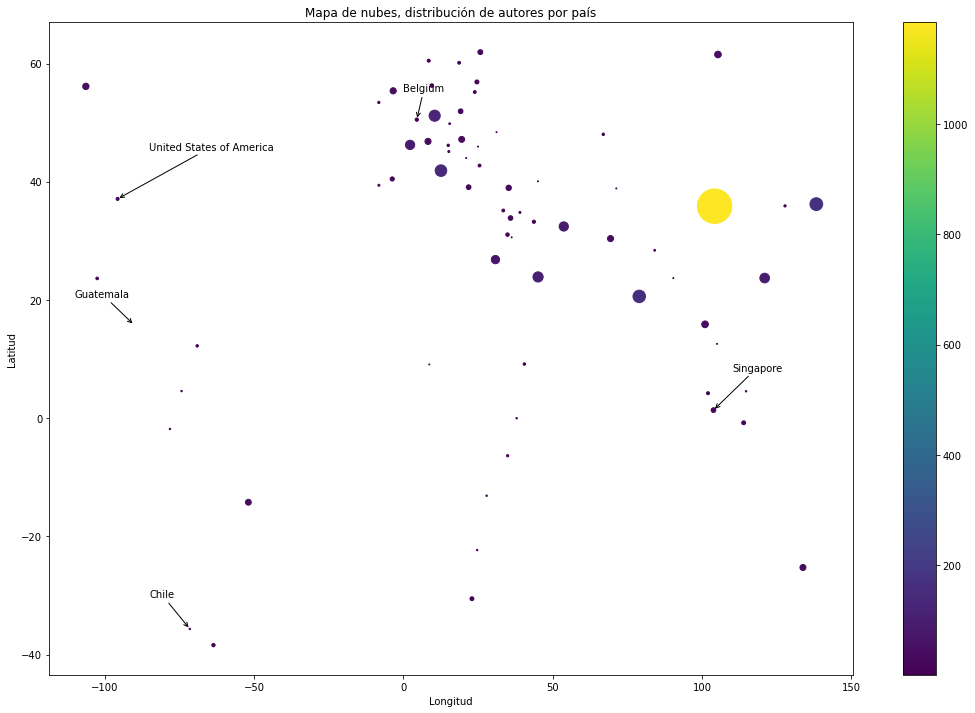

In [7]:
e=msc.mapscience(a)
e

Guatemala se encuentra en las coordenadas 17°N ; 92°O 

Estados Unidos se encuentra en las coordenadas 35°N : 100 O

Belguinm se encuentra en las coordenadas 53°N : 10° E

Singapore se encuentra en las coordenadas 4°N : 105 °E

Chile se encuentra 38° S y 58° O

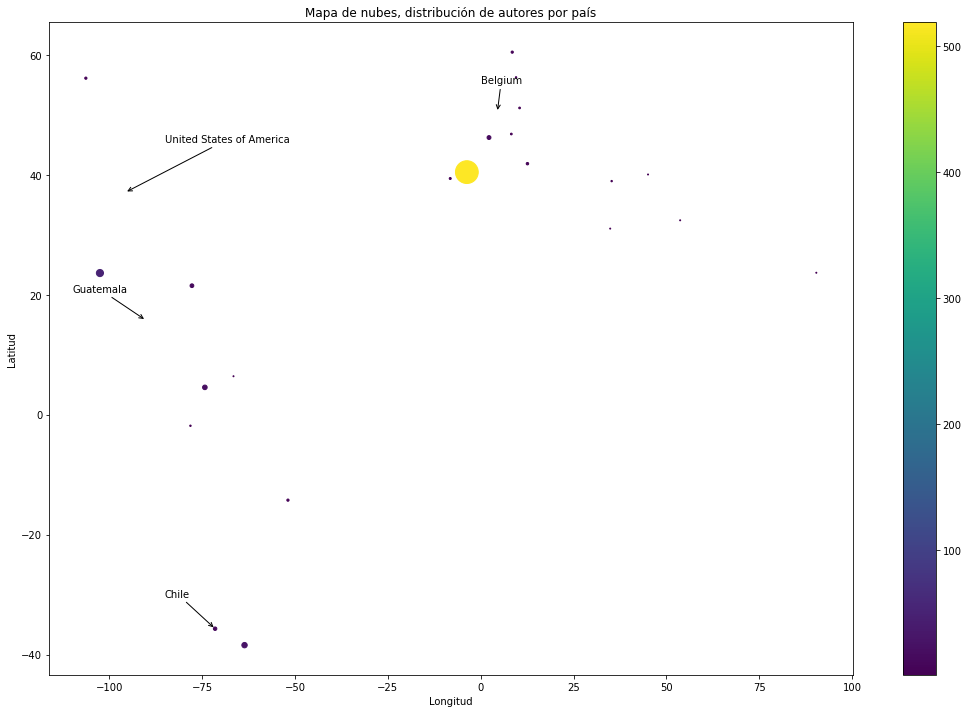

In [8]:
f = msc.mapscience(c)
f

## Ejercicio 4 [1 punto]

**Interprete** los resultados de las figuras del **ejercicio 3**

*Escriba la respuesta del ejercicio 3*



## Ejercicio 5 [2 puntos]

Para algún **gen de interés** (podría usar [Lista de genes por tipología](https://www.genome.jp/kegg/pathway.html#metabolism)), realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda y guarde en la carpeta ```data```.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de las secuencias de los **quince primeros** IDs de la accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Guarde su arbol filogénetico en la carpeta ```img```

5. Interprete el árbol del paso 4. 

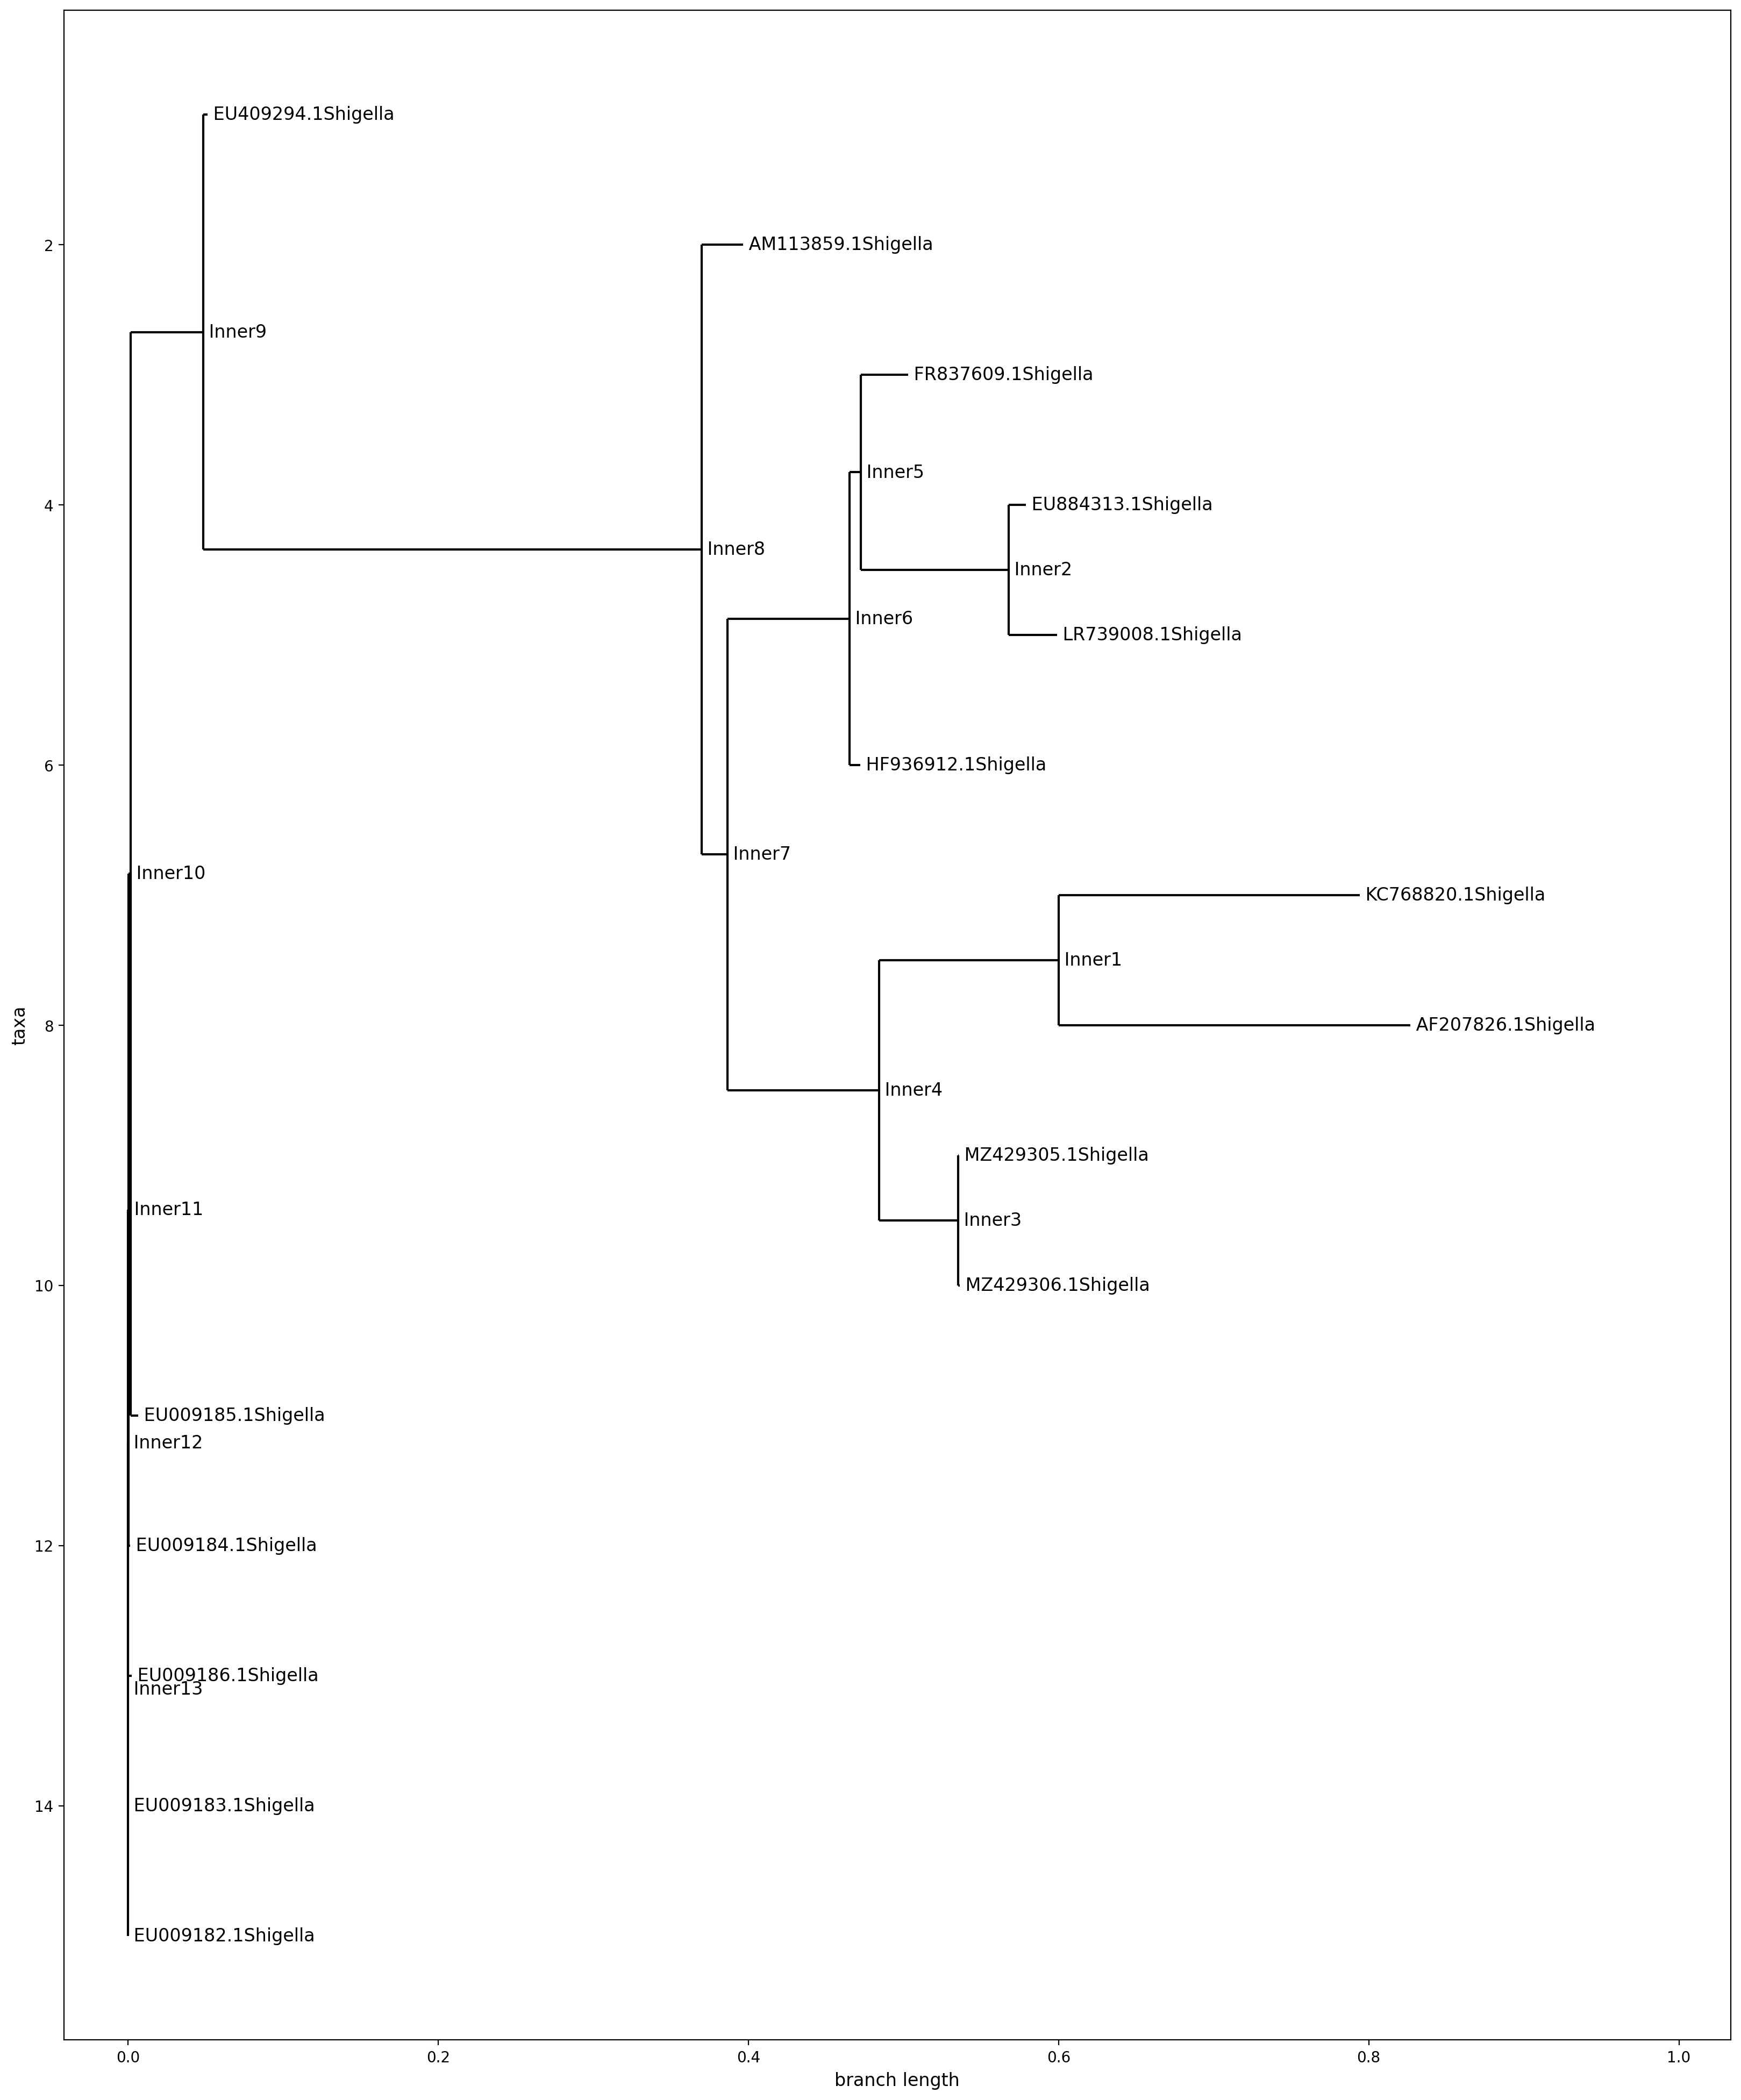

In [13]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio.Phylo.TreeConstruction import DistanceCalculator 
from Bio.Align.Applications import ClustalwCommandline
from Bio import AlignIO
from Bio import Phylo
from Bio import Entrez
from Bio import SeqIO
import Bio
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib
import matplotlib.pyplot as plt

with open("Data/sequence(2).seq","r") as archivo:
    b=archivo.read()
    c=b.split('\n')
    a=0
    ListID=[]
    for line in c:
        if a != 15:
            ListID.append(line)
            a=a+1

Entrez.email = "jefferson.hernandez@est.ikiam.edu.ec" 
ofile=open('Data/SequenceD.gb','w')
with Entrez.efetch( db="nucleotide", rettype="gb", retmode="text", id= ListID) as handle: 
    for seq_record in SeqIO.parse(handle, "gb"): 
        ofile.write(">"+str(seq_record.id)+str(seq_record.description[:50])+'\n')
        ofile.write(str(seq_record.seq)+'\n')
        ofile.write('\n')

ffile=open('Data/SequenceD.fasta','w')
with open("Data/SequenceD.gb",'r') as genbank:
    c=genbank.read()
    for line in c:
        ffile.write(str(line))

clustalw_exe = r"C:\Program Files (x86)\ClustalW2\clustalw2.exe"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile = "Data/SequenceD.fasta")
assert os.path.isfile(clustalw_exe), "Clustal_W executable is missing or not found"
stout,stderr = clustalw_cline()

ClustalAlign = AlignIO.read("Data/SequenceD.aln", "clustal")

calculator = DistanceCalculator('identity')
distance_matrix = calculator.get_distance(ClustalAlign)

constructor = DistanceTreeConstructor(calculator)
Data_tree = constructor.build_tree(ClustalAlign)
Data_tree.rooted = True

Phylo.write(Data_tree, "Data/Data_tree.xml", "phyloxml")

fig = plt.figure(figsize=(20, 25), dpi=200)  
matplotlib.rc('font', size=12)               
matplotlib.rc('xtick', labelsize=10)       
matplotlib.rc('ytick', labelsize=10)       
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(Data_tree, axes=axes)

**Escriba aquí la interpretación del árbol**


## Ejercicio 6 [1 punto]


1. Cree en GitHub un repositorio de nombre ```GBI6_ExamenPython```. 
2. Cree un archivo ```Readme.md``` que debe tener lo siguiente: 
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada
- Un diagrama de procesos del módulo ```miningscience```
3. Asegurarse que su repositorio tiene las carpetas ```data``` e ```img``` con los archivos que ha ido guardando en las preguntas anteriores.  
4. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 5), con un mensaje que inicie como: 

```sh 
Carlitos Alimaña ha realizado el ejercicio 1  
```
```sh 
Carlitos Alimaña ha realizado el ejercicio 2
```
```sh 
...
```
